使用`点互信息`以表示高频次上下文共现的权重信息

In [1]:
import numpy as np

In [2]:
# 初始化一个矩阵，表示每个词在每个文档中出现的次数
M = np.array([
    [0,2,1,1,1,1,1,2,1,3],
    [2,0,1,1,1,0,0,1,1,2],
    [1,1,0,1,1,0,0,0,0,1],
    [1,1,1,1,0,0,0,0,0,1],
    [1,0,0,0,0,0,1,1,0,1],
    [1,0,0,0,0,1,0,1,0,1],
    [2,1,0,0,0,1,1,0,1,2],
    [1,1,0,0,0,0,0,1,0,1],
    [3,2,1,1,1,1,1,2,1,0],
])

In [3]:
# 定义PMI共现信息计算函数
def pmi(M,positive=True):
    try:
        assert isinstance(M,np.ndarray)
    except:
        print("M must be a numpy.ndarray")
        return None
    col_totals = M.sum(axis=0) # 按列求和
    row_totals = M.sum(axis=1) # 按行求和
    total = col_totals.sum() # 计算总频次
    expected = np.outer(row_totals,col_totals)/total # 获得每个元素的分子
    M = M/expected 
    with np.errstate(divide='ignore'): # 忽略log(0)的警告
        M = np.log(M) # 计算log
    M[np.isinf(M)] = 0 # 将负无穷大的值设为0
    if positive: # 如果强制为正值
        M[M<0] = 0 # 将负值设为0
    return M

In [5]:
M_pmi = pmi(M,positive=True)
np.set_printoptions(precision=2) # 设置输出精度
print(M_pmi)

[[0.   0.22 0.22 0.   0.22 0.22 0.22 0.22 0.22 0.22]
 [0.19 0.   0.59 0.37 0.59 0.   0.   0.   0.59 0.19]
 [0.08 0.49 0.   0.96 1.18 0.   0.   0.   0.   0.08]
 [0.08 0.49 1.18 0.96 0.   0.   0.   0.   0.   0.08]
 [0.3  0.   0.   0.   0.   0.   1.4  0.71 0.   0.3 ]
 [0.3  0.   0.   0.   0.   1.4  0.   0.71 0.   0.3 ]
 [0.3  0.02 0.   0.   0.   0.71 0.71 0.   0.71 0.3 ]
 [0.3  0.71 0.   0.   0.   0.   0.   0.71 0.   0.3 ]
 [0.22 0.22 0.22 0.   0.22 0.22 0.22 0.22 0.22 0.  ]]


In [6]:
# 通过词共现信息计算奇异值分解，通过调用Numpy线性算法模块即可计算
U,s,Vh = np.linalg.svd(M_pmi)

In [8]:
len(U)

9

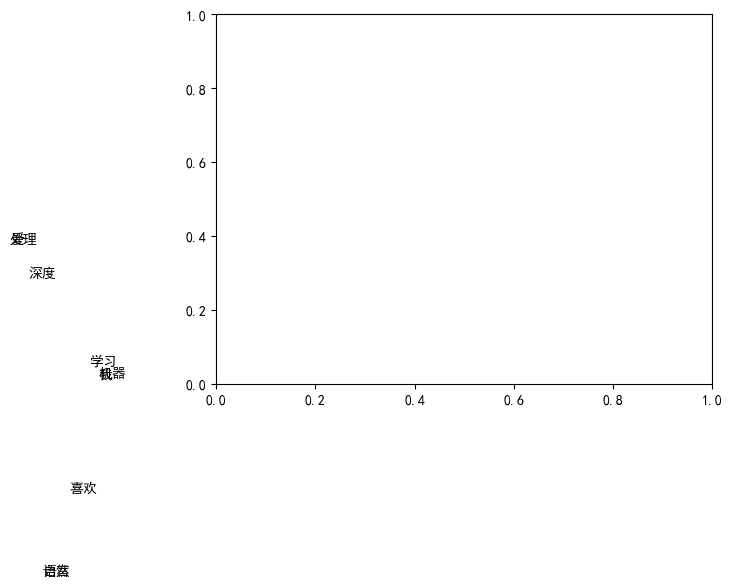

In [10]:
# 绘制截断奇异值分解的结果
import matplotlib.pyplot as plt
words = ["我","喜欢","自然","语言","处理","爱","深度","学习","机器"]
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len(words)):
    plt.text(U[i,0],U[i,1],words[i])